## PCA & KMeans for Imagery Analysis

By Meetra Nouri

In [ ]:
from __future__ import print_function
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
import os
import math
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')

In [ ]:
np.random.seed(21)

klearn.datasets.load_digits(*, n_class=10, return_X_y=False, as_frame=False)[source]
Load and return the digits dataset (classification).

Each datapoint is a 8x8 image of a digit.

Classes
10

Samples per class
180

Samples total
1797

Dimensionality
64

Features
integers 0-16

In [ ]:
digits=load_digits()

digits.data.shape, digits.target.shape

((1797, 64), (1797,))

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [ ]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
data=pd.DataFrame(digits.data)
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

DataFrame.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000,13.000000,10.000000,1.000000,0.0,0.000000,0.000000,6.000000,7.000000,8.000000,9.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,15.000000,16.000000,15.000000,14.000000,2.000000,0.000000,0.000000,4.000000,15.000000,12.000000,13.000000,14.00

**PCA**(principal component analysis )

sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

 this class does not support sparse input. See TruncatedSVD for an alternative with sparse data.

whiten

When True (False by default) ensure uncorrelated outputs with unit component-wise variances.

Whitening will remove some information from the transformed signal (the relative variance scales of the components) but can sometime improve the predictive accuracy of the downstream estimators by making their data respect some hard-wired assumptions.

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=0.90)
pca.fit_transform(data)

pca.n_components_, pca.explained_variance_ratio_

(21, array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
        0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
        0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
        0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
        0.00889538]))

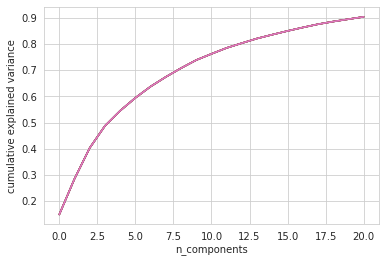

In [ ]:
for i in range(1,8):
  pca=PCA(n_components=0.90)
  pca.fit_transform(data)
  plt.plot(np.cumsum(pca.explained_variance_ratio_))
  plt.xlabel('n_components')
  plt.ylabel('cumulative explained variance')
  #plt.grid()

sklearn.cluster.**KMeans**(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

inertia

Sum of squared distances of samples to their closest cluster center.

In [ ]:
df=pca.fit_transform(data)

In [ ]:
df.shape

(1797, 21)

In [ ]:
df[0]

array([-1.25946645, 21.27488348, -9.46305462, 13.01418869, -7.12882278,
       -7.44065876,  3.25283716,  2.55347036, -0.58184214,  3.62569695,
        2.58595688,  1.55160708,  0.85449671, -3.33874935,  5.90658968,
        2.74359339,  0.41983691, -0.89814969,  0.70261087, -3.46211868,
        2.68084958])

**Elbow Method**

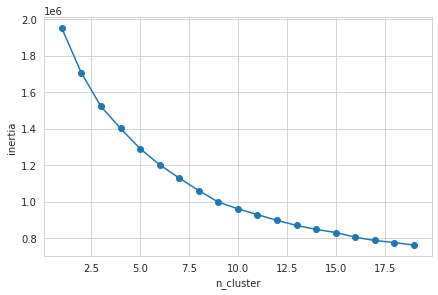

In [ ]:
from sklearn.cluster import KMeans

inertia=[]
for i in range(1,20):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df)
  inertia.append(kmeans.inertia_)
plt.plot(range(1,20), inertia, marker='o')
plt.tight_layout()
plt.xlabel('n_cluster')
plt.ylabel('inertia');

**Silhouette_Score**

sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)

Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1

Compute the mean Silhouette Coefficient of all samples.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

Text(0, 0.5, 'silhouette_score')

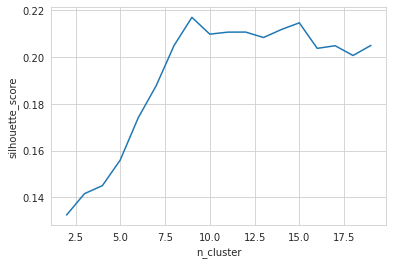

In [ ]:
sse=[]
for i in range(2,20):
  kmeans=KMeans(n_clusters=i)
  label=kmeans.fit_predict(df)
  sse.append(silhouette_score(df, label))
plt.plot(range(2,20), sse)
plt.xlabel('n_cluster')
plt.ylabel('silhouette_score')

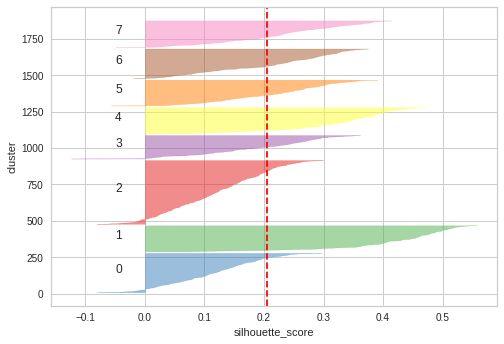

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(8)
SilhouetteVisualizer(kmeans,colors='yellowbrick').fit(df)
plt.xlabel('silhouette_score')
plt.ylabel('cluster');

The vertical dashed lines represent the silhouette score for each number of clusters.

When most of the instances in a cluster have a lower coefficient than this score 
(i.e., if
many of the instances stop short of the dashed line, ending to the left of it), then the
cluster is rather bad since this means its instances are much too close to other clusters.

Text(0, 0.5, 'cluster')

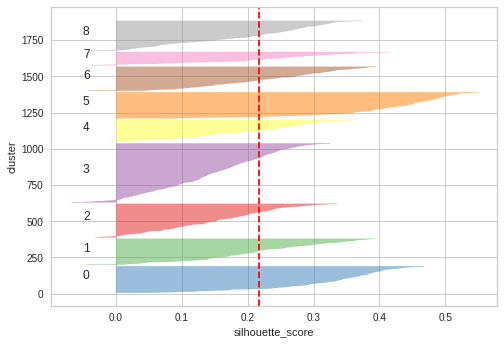

In [ ]:
kmeans = KMeans(9)
SilhouetteVisualizer(kmeans,colors='yellowbrick').fit(df)
plt.xlabel('silhouette_score')
plt.ylabel('cluster');

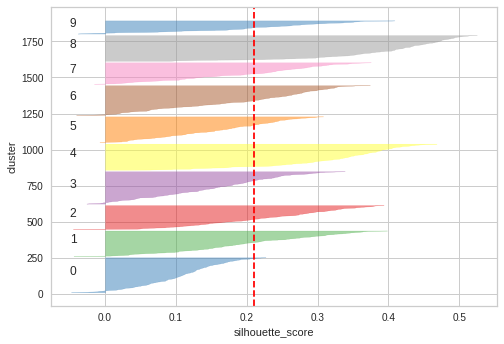

In [ ]:
kmeans = KMeans(10)
SilhouetteVisualizer(kmeans,colors='yellowbrick').fit(df);
plt.xlabel('silhouette_score')
plt.ylabel('cluster');

when k=9 or
k=10, the clusters look pretty good – most instances extend beyond the dashed line, to
the right and closer to 1.0

In [ ]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=9)
kmeans.fit_transform(df)
label=kmeans.fit_predict(df) #or label=kmeans.predict(df)

n_labels=np.unique(label)
n_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [ ]:
kmeans.labels_

array([2, 5, 5, ..., 5, 7, 7], dtype=int32)

In [ ]:
kmeans.cluster_centers_[0]

array([23.41608113,  0.28596989, -8.01088852, -2.65802596,  0.85157582,
       -0.20673646,  3.74242685,  7.73055304,  0.13575873, -1.38600454,
        1.47171189, -3.22806375,  1.09596291,  0.19728263, -1.685392  ,
       -2.82731504, -0.51349118, -1.56010097,  0.39381114, -0.56381561,
       -0.34493587])

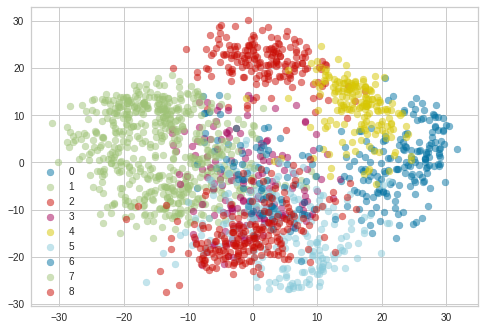

In [ ]:
for i in n_labels:
  plt.scatter(x=df[label==i,0], y=df[label==i,1], label=i, alpha=0.5)
plt.legend()
#plt.grid()